# A statistical freshener of Titanic data

In [1]:
#Import libraries
import math
import string
import random
import decimal
import statistics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.preprocessing import Imputer

In [82]:
GS = pd.read_csv('gender_submission.csv')
TRAIN = pd.read_csv('train.csv')
TEST = pd.read_csv('test.csv')

In [3]:
GS.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [4]:
TRAIN.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
TEST.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# We'll continue with our TRAIN set. 

Our trainset consist of rows of PassengerID's with like Embarkation, PassengerClass, Name, Sex, Age, and number of children to describe each person associated with his or her passenger id. If you are new to statistics you might wonder how to describe and visualise data so that it represents your analysis correctly. Sometimes coding comes down to puzzling out the subject matter based on well-defined assumptions. Let's analyse our data such that it relates to death toll.

Let's clean up the data and explore the ranges and variances of means and standard deviations of the variables we are interested in. After that we can visualise our variables and infer information to further define & statistically associate variables, which we will then visualise. Are you still with me? Let's goo!


# Let's start by exploring

Let's check if we have any Nan values in our dataset that can skew our distribution. Knowing this saves time in creating a visualisation.   

In [6]:
TRAIN.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
TRAIN['PassengerId'].count()

891


# Age
In our dataset the variables Age misses 177 entries, Cabin 687 entries and Embarked 2 entries. 

Thanks to mathematics we can handle missing data by imputing algorithmically. We can take the mean and fill all empty entries with the mean. What we also can do is take the median value. That allows robustness against outliers. What that means is that values that lie statistically far away from the other observed values account for skewness in the distribution of all observed values. To visualise this I create a distribution of our age entries with missing entries and then fill the missing points in our data set. 

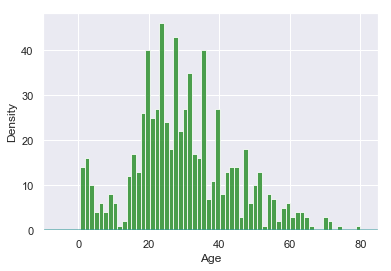

Stacked counts of ages


In [8]:
# Barchart Class occurences 
fig, ax = plt.subplots()
ax = TRAIN["Age"].hist(bins=60, density=False, stacked=True, color='forestgreen', alpha=0.8)
TRAIN["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

print ('Stacked counts of ages')

Let's add a line that tips all highest values of an occurence for an age item. Simply add 'density=True' to your ax variable.

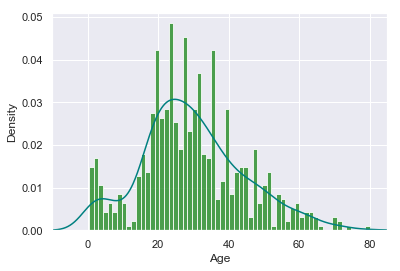

Stacked counts of ages with density plot line


In [9]:
# Barchart Class occurences 
fig, ax = plt.subplots()
ax = TRAIN["Age"].hist(bins=60, density=True,
                       stacked=True,
                       color='forestgreen', 
                       alpha=0.8)
TRAIN["Age"].plot(kind='density', 
                  color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

print ('Stacked counts of ages with density plot line')

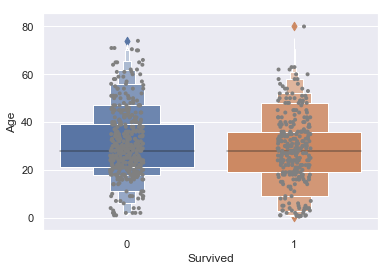

In [10]:
#Create a boxenplot with jitter values
ax = sns.boxenplot(x="Survived", y="Age", data=TRAIN)
ax = sns.stripplot(x="Survived", y="Age", data=TRAIN,
                    size=4, jitter=True, color="gray")

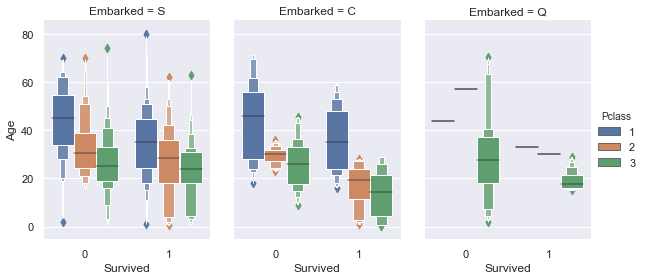

In [11]:
#Another boxenplot
e = sns.catplot(x="Survived", y="Age",
                hue='Pclass', col= 'Embarked',
                data=TRAIN,
                 kind="boxen",
                height=4, aspect=.7);

Because our data is distributed we can not simply impute a variable, because our ground truth, the distribution, is skewed. For example, if we would impute 1500 averages it would make much difference to our groundtruth where our observations of 10000 passengers are based on, the ratio is 20%. In our above example we see a binomial distribution. Let's split our data into groups so that we can account for variances. The kink of the line on face value falls between 0 and 18. Let's create a new list from our age category with C,'children', for persons =< 18, A, 'adults, for persons above 18.

In [12]:
AgeFilter = []
for i in TRAIN['Age']:
    if i <= 18:
        AgeFilter.append('C')
    else:
        AgeFilter.append('A')
        
indexx = 0
TRAIN.insert(loc=indexx, column='AgeFilter', value=AgeFilter)

In [13]:
TRAIN.head()


,AgeFilter,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,A,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,A,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,A,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,A,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,A,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We'll use this categorical value to account for differences between survivors and non survivors.

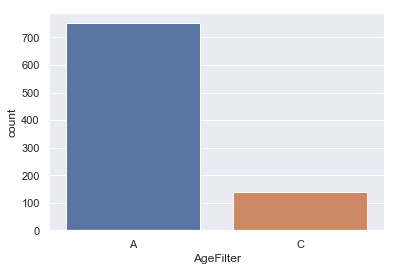

In [14]:
sns.countplot(TRAIN['AgeFilter'])


We can see that 1/5th of our examples are labeled C. We can impute that same ratio to our samples to account for missing data. The exact ratio is 19.7% based on 177 missing entries and 891 observations. This means we have to impute  a value below 18 for 19.7% of our 177 of missing entries, and for the other 80,3% a value > 18. Which values to take?

Let's calculate group means for the groups below and above the age of 18. 

In [15]:
a_list= []
c_list=[]
nan_list = []
for i in TRAIN['Age']:
    if i >= 18.0:
        a_list.append(i) 
    elif 0.1 < i < 18.0:
        c_list.append(i)
    else:
        nan_list.append(i)

avg_a = sum(a_list)/len(a_list)
avg_c = sum(c_list)/len(c_list)

#Print averages of C and A class
print ('The average of age of A, Adults, = ',avg_a)
print ('The average of age of C, Children, = ',avg_c)

#Print sum of nan_list
print ('The sum of all nan-values is : ', sum(math.isnan(x) for x in nan_list))

#Print type and first 5 elements of nan_list
print ('The type of the nan-values are: ', type(nan_list[0]))
print ('The first 5 elements of the nan-values list: ', nan_list[:5])

The average of age of A, Adults, =  33.58319467554077
The average of age of C, Children, =  9.041327433628318
The sum of all nan-values is :  177
The type of the nan-values are:  <class 'float'>
The first 5 elements of the nan-values list:  [nan, nan, nan, nan, nan]


Now that we have our means for our different age groups we can impute our data based on the same ratio. Of our nan-values we will impute 35 (19,8% rounded) nan-values with the avg_c = 9.04 , for persons < 18 and for all other nan-values we'll impute avg_a = 33.58. This way we are sure that our imputed values follow the same expected distribution of our binomial age distribution. 

To do this we have to append the all float values to a new list as strings. We will iterate over the items in the list that contain a string returned by the isnull parameter, and set a count to 0. Doing this makes sure we only grab the nan-values in our next line. If the count is lower than 35 and if that item returns True we will impute the average of
children, and for the other nan-values we will impute the average of adults.

To confuse it all a bit more we randomly iterate over our nan-values to impute our averages for children and adults. This way our bias reduces more. It reduces, because if we impute our values in order, we basically add another factor that tweaks the data. It might not be significant in this case, but it adds unnecessary bias to our interpretation. If we instead randomly iterate over all the nan-values that have adjecent columns of information and assign an age value to that row of data, we reduce chances of not following the normal distribution underlying the age values in relation to all person specific related columns of information.

In case of prediction imputing can heavily influence minimising your residual errors. But that's for a later stage. Let's first see if we can replace 20% of our nan-values with the averages of children and 80% with the avgs of adults.


In [16]:
##Change every nan-value first to 0
#Create two lists to convert all floats to str
agelist = list(TRAIN['Age'])
jsl = []

#Iterate over list
for i in agelist:
    #Change i to string
    i = str(i)
    #Append i to list
    jsl.append(i)
#Change agelist to list of strings
agelist = jsl

print (agelist[:10])

 
    

['22.0', '38.0', '26.0', '35.0', '35.0', 'nan', '54.0', '2.0', '27.0', '14.0']


In [17]:
#Print first 10 values
for i in (agelist[:10]):
    print (type(i))
    

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


Let's shuffle the elements in our agelist, but keep a print of the order of the unique shuffle. We can than call the original value associated with the same order position as the converted integer, float or string. (Got this one from Stackoverflow comment: https://stackoverflow.com/questions/26577517/inverse-of-random-shuffle/42302431)

In [18]:
#Randomly shuffle input
def shuffle_forward(l):
    #Take all elements from 0 to length(list) and shuffle them by that order
    order = list(range(len(l))); random.shuffle(order)
    #Return a list of the array of the randomly shuffled elements 
    #The order on the array is random, but observed as the above function executes, 
    #and thus creates an unique pattern that can be listed in order
    return list(np.array(l)[order]), order

#Take the elements and the order range set of the elements
def shuffle_backward(l, order):
    #Define a var that creates a new np array of width 0 and length len(l)
    l_out = [0] * len(l)
    
    #Index the order of the input of the randomly assigned values to the np array as i, j
    for i, j in enumerate(order):
        #For every element j in the var l_out == [0],
        #the element is placed back on the order of the original list when shuffled in the shuffle_forward function 
        l_out[j] = l[i]
        
    #Return list of the inverse shuffled original list   
    return l_out


Let's test our functions. 

In [19]:
## First our shuffle_forward function
#Create testlist
testlist = [1, 10, 100, 1000,434,4456,673,3434,8298,2893793]

#Forward shuffle our testlist
testlistshuffle, testlist_order = shuffle_forward(testlist)
#Run function on testlist and define order from shuffle_forward function
print ('This is the testlist: ', testlist)
print ('This is the new shuffled list ', testlistshuffle) 
print ('This is the order in which the items were shuffled ', testlist_order)



This is the testlist:  [1, 10, 100, 1000, 434, 4456, 673, 3434, 8298, 2893793]
This is the new shuffled list  [1000, 2893793, 100, 434, 8298, 673, 3434, 10, 4456, 1]
This is the order in which the items were shuffled  [3, 9, 2, 4, 8, 6, 7, 1, 5, 0]


In [20]:
##Next our shuffle_backward function
print ('This is the testlist: ', testlist)
print ('This is the new shuffled list ', testlistshuffle) 
print ('This is the order in which the items were shuffled ', testlist_order)

#Shuffle back with order of testlist
testlistbackshuffle = shuffle_backward(testlistshuffle,testlist_order)

print ('This is the backwards shuffle or the new shuffled list into the testlist: ', testlistbackshuffle)


This is the testlist:  [1, 10, 100, 1000, 434, 4456, 673, 3434, 8298, 2893793]
This is the new shuffled list  [1000, 2893793, 100, 434, 8298, 673, 3434, 10, 4456, 1]
This is the order in which the items were shuffled  [3, 9, 2, 4, 8, 6, 7, 1, 5, 0]
This is the backwards shuffle or the new shuffled list into the testlist:  [1, 10, 100, 1000, 434, 4456, 673, 3434, 8298, 2893793]


# It works! 
Let's implement it on our age list to shuffle our strings, impute the nan-values with the right averages and shuffle the list backwards by order.

Let's create a function that we can call when the deck is shuffled and assigns the right averages to the nan-values before shuffling back the same index by enumerating the order. Because we use our averages, we have to ready and clean them up to replace the string nan-values. This means converting rounding them up to 2 decimal points, as in the original TRAIN['Age'] column and convert the float to a string.

In [21]:
#Convert averages to decimals, round them to two integers behind decimal and convert average item to string
avg_a =  decimal.Decimal(avg_a)
avg_a = round(avg_a,2)
avg_a = str(avg_a)

avg_c =  decimal.Decimal(avg_c)
avg_c = round(avg_c,2)
avg_c = str(avg_c)

In [22]:
print (avg_a)
print (avg_c)

33.58
9.04


In [23]:
#Impute function to rectify age values according to the binomial distribution
def age_rect(klist):
    #Create empty list and set count to 0
    dlist = []
    count = 0
    #Iterate over the agelist
    for i in klist:
        #Filter i on 'nan', count < 35
        if i == 'nan' and count <35: 
            #Append average of C category children
            dlist.append(avg_c)
            #Increment count 
            count += 1
        #Filter if count >= 35
        elif i == 'nan' and count >= 35:
                dlist.append(avg_a)
                count += 1
        else:
            #Append i if i is an age value
            dlist.append(i)
            
        
    #Returns list of values
    print (dlist[:6])
    print (type(dlist[6]))
    
    return dlist

So, again. 

1. Let's first shuffle our order of indexes with age items. 

2. We iterate over the first 19.8% (approx. first 35) of random integers of 177 string nan entries between 0 and 177 of nan observations.Then change our 20% of our nan-values with the average of the C category children,  and 80% with the average of the A category adults. 

3. Then we can assign the shuffled index with the same order back, because we reserved the order of randomizing the index of the age items.

We do this to reduce bias. 

In [24]:
#Shuffle age list and assign order 
shuffled_agelist, order_agelist = shuffle_forward(agelist)

#Print shuffled age list and order
print (shuffled_agelist[:20])
print (order_agelist)

['41.0', '58.0', 'nan', 'nan', 'nan', '25.0', '19.0', '25.0', '31.0', '42.0', 'nan', 'nan', '24.0', 'nan', 'nan', '17.0', '70.5', 'nan', '48.0', '42.0']
[254, 195, 563, 459, 613, 666, 27, 370, 215, 217, 48, 560, 127, 264, 481, 114, 116, 538, 460, 845, 874, 327, 723, 852, 278, 232, 689, 20, 103, 379, 774, 541, 242, 21, 582, 289, 712, 837, 598, 820, 614, 510, 225, 286, 872, 696, 342, 641, 197, 869, 709, 455, 410, 79, 739, 204, 7, 58, 388, 35, 691, 662, 418, 443, 341, 840, 87, 300, 255, 138, 694, 369, 118, 745, 503, 125, 146, 828, 343, 71, 405, 679, 193, 415, 52, 355, 594, 498, 535, 272, 698, 878, 158, 640, 393, 190, 380, 643, 73, 360, 199, 308, 886, 414, 129, 387, 674, 335, 752, 227, 450, 309, 163, 334, 565, 487, 665, 47, 17, 787, 411, 537, 90, 692, 858, 800, 890, 223, 161, 606, 419, 798, 738, 338, 847, 358, 303, 357, 555, 4, 506, 429, 391, 765, 109, 238, 553, 670, 396, 542, 603, 471, 838, 888, 519, 546, 759, 436, 835, 61, 3, 448, 683, 408, 85, 136, 601, 611, 72, 722, 321, 156, 198, 330,

# That is one big key!

Well, actually it is. Pretty cool! Let's use this order-key to re-assign our index with the right age items. But, as you can see, we still have nan-values. Let's change those and than shuffle the list backwards. 

In [25]:
rect_shuff_agelist = age_rect(shuffled_agelist)
print ('First 10 elements of our shuffled rectified age list :', (rect_shuff_agelist[:10]))

['41.0', '58.0', '9.04', '9.04', '9.04', '25.0']
<class 'numpy.str_'>
First 10 elements of our shuffled rectified age list : ['41.0', '58.0', '9.04', '9.04', '9.04', '25.0', '19.0', '25.0', '31.0', '42.0']


In [26]:
new_age_list = shuffle_backward(rect_shuff_agelist, order_agelist)

print ('The first 6 elements of our age list:         ', (agelist[:6]))
print ('The first 6 elements of our imputed age list: ', new_age_list[:6])


The first 6 elements of our age list:          ['22.0', '38.0', '26.0', '35.0', '35.0', 'nan']
The first 6 elements of our imputed age list:  ['22.0', '38.0', '26.0', '35.0', '35.0', '33.58']


Now, the last part is converting every item in our new_age_list to a float, and pass it into our dataframe to visualise the distribution of our age category.


In [27]:
age_list_to_float = [float(i) for i in new_age_list]

print ('These are the first 6 elements of our float new_age_list: ', age_list_to_float[:6])
print ('These are the first 6 elements class descriptions of our float new_age_list : ', type(age_list_to_float[1]),
                                                                                             type(age_list_to_float[2]),
                                                                                                 type(age_list_to_float[3]))


These are the first 6 elements of our float new_age_list:  [22.0, 38.0, 26.0, 35.0, 35.0, 33.58]
These are the first 6 elements class descriptions of our float new_age_list :  <class 'float'> <class 'float'> <class 'float'>


# Back to our dataframe
Let's insert our new age list into our dataframe!

In [28]:
#Assign column to new list
TRAIN['Age'] = age_list_to_float

#Show new dataframe
TRAIN[:10]

,AgeFilter,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,A,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,A,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,A,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,A,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,A,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,A,6,0,3,"Moran, Mr. James",male,33.58,0,0,330877,8.4583,NaN,Q
6,A,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,C,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,A,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,C,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


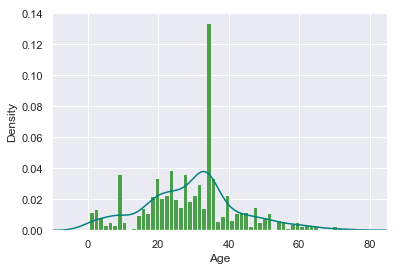

Stacked counts of rectified ages with density plot line


In [29]:
# Barchart Class occurences 
fig, ax = plt.subplots()
ax = TRAIN["Age"].hist(bins=60, density=True,
                       stacked=True,
                       color='forestgreen', 
                       alpha=0.8)
TRAIN["Age"].plot(kind='density', 
                  color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

print ('Stacked counts of rectified ages with density plot line')

As you can see our distribution becomes less binomial. It widens the tails of our distribution a bit. If we would repeat the forwards and backwards shuffling, sum all the distributions up and divide by n distributions we get a standard bell curve. In the middle we can see a long stack of ages. This does not look good, and we will investigate it with a boxplot.

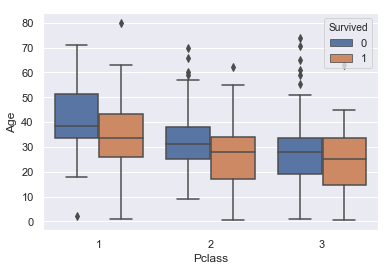

In [30]:
sns.boxplot(x="Pclass", y="Age",
                hue="Survived",
                data=TRAIN)


/anaconda3/envs/CodexA/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


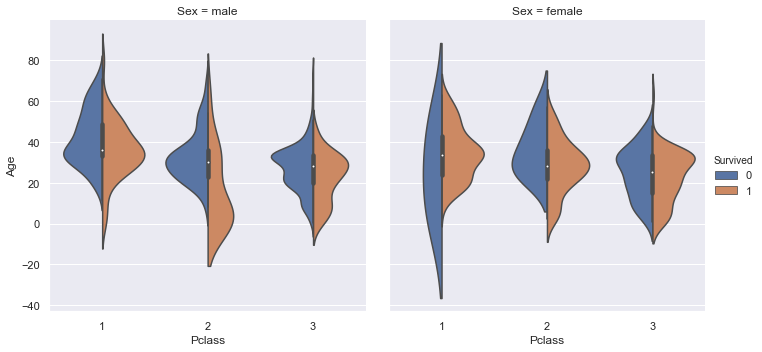

In [31]:
g = sns.catplot(x="Pclass", y="Age",
                hue="Survived",
                col="Sex",
                data=TRAIN,
                kind="violin",
                split=True);



Our data is of course heavily skewed. Maybe we should impute the median instead of the mean in our dataframe. 

# Impute median to our age_list
We have to adjust our function age_rect to impute the median of our values. Let's first calculate the median for both groups and then adjust our age_rect to impute the median value and return a new list. Remember, because we will shuffle our age list again, we will have another random shuffle with a unique order that we can use to shuffle our sequence of age items back to the original sequence. 

Let's copy paste and run some of the code I've wrote above. 


In [32]:
TRAIN = pd.read_csv('train.csv')
AgeFilter = []
for i in TRAIN['Age']:
    if i <= 18:
        AgeFilter.append('C')
    else:
        AgeFilter.append('A')
        
indexx = 0
TRAIN.insert(loc=indexx, column='AgeFilter', value=AgeFilter)
TRAIN.head()

,AgeFilter,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,A,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,A,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,A,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,A,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,A,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
#Append all age values according to category to lists
a_m_list= []
c_m_list=[]
nan_1_list = []
for i in TRAIN['Age']:
    if i >= 18.0:
        a_m_list.append(i) 
    elif 0.1 < i < 18.0:
        c_m_list.append(i)
    else:
        nan_1_list.append(i)

#Use statistics module to calculate the median 
med_a = statistics.median(a_m_list)
med_c = statistics.median(c_m_list)

#Print averages of C and A class
print ('The median of age of A, Adults, = ',avg_a)
print ('The median of age of C, Children, = ',avg_c)


The median of age of A, Adults, =  33.58
The median of age of C, Children, =  9.04


In [34]:
##Change every nan-value first to string
#Create two lists to convert all floats to str
m_agelist = list(TRAIN['Age'])
jsl = []

#Iterate over list
for i in m_agelist:
    #Change i to string
    i = str(i)
    #Append i to list
    jsl.append(i)
#Change agelist to list of strings
agelist = jsl

print (agelist[:10])



['22.0', '38.0', '26.0', '35.0', '35.0', 'nan', '54.0', '2.0', '27.0', '14.0']


In [35]:
#Convert median to decimals, round them to two integers behind decimal and convert average item to string
med_a =  decimal.Decimal(med_a)
med_a = round(med_a,2)
med_a = str(med_a)

med_c =  decimal.Decimal(med_c)
med_c = round(med_c,2)
med_c = str(med_c)

In [36]:
#Shuffle age list and assign order 
shuffled_agelist, order_agelist = shuffle_forward(agelist)

#Print shuffled age list and order
print (shuffled_agelist[:20])
print (order_agelist)

['2.0', '40.0', '50.0', '2.0', 'nan', '36.0', '28.0', '54.0', '39.0', '30.0', '0.67', '62.0', '39.0', '27.0', '8.0', '34.0', '33.0', '22.0', '9.0', '40.0']
[824, 161, 259, 340, 235, 344, 83, 249, 835, 178, 755, 829, 811, 717, 549, 461, 412, 320, 182, 661, 95, 813, 740, 409, 861, 31, 313, 576, 38, 523, 74, 700, 223, 195, 26, 171, 837, 141, 311, 559, 591, 307, 275, 650, 103, 508, 798, 638, 67, 627, 228, 429, 197, 351, 327, 232, 5, 592, 467, 300, 506, 210, 431, 303, 728, 355, 748, 612, 130, 364, 804, 437, 675, 507, 516, 276, 647, 715, 390, 205, 524, 348, 770, 572, 407, 535, 187, 231, 383, 472, 697, 500, 449, 254, 663, 743, 477, 283, 641, 600, 699, 557, 229, 233, 323, 221, 104, 754, 363, 555, 692, 365, 204, 413, 882, 761, 211, 109, 887, 871, 666, 428, 582, 421, 325, 777, 19, 827, 625, 23, 838, 105, 328, 634, 693, 828, 588, 540, 479, 160, 881, 101, 117, 662, 40, 339, 136, 802, 633, 295, 884, 408, 91, 125, 859, 845, 289, 314, 749, 869, 685, 368, 222, 174, 238, 667, 56, 862, 380, 395, 750, 62

In [37]:
rect_shuff_agelist = age_rect(shuffled_agelist)
print ('First 10 elements of our shuffled rectified age list :', (rect_shuff_agelist[:10]))

['2.0', '40.0', '50.0', '2.0', '9.04', '36.0']
<class 'numpy.str_'>
First 10 elements of our shuffled rectified age list : ['2.0', '40.0', '50.0', '2.0', '9.04', '36.0', '28.0', '54.0', '39.0', '30.0']


In [38]:
new_age_list = shuffle_backward(rect_shuff_agelist, order_agelist)

print ('The first 6 elements of our age list:         ', (agelist[:6]))
print ('The first 6 elements of our imputed age list: ', new_age_list[:6])


The first 6 elements of our age list:          ['22.0', '38.0', '26.0', '35.0', '35.0', 'nan']
The first 6 elements of our imputed age list:  ['22.0', '38.0', '26.0', '35.0', '35.0', '9.04']


In [39]:
age_list_to_float = [float(i) for i in new_age_list]

print ('These are the first 6 elements of our float new_age_list: ', age_list_to_float[:6])
print ('These are the first 6 elements class descriptions of our float new_age_list : ', type(age_list_to_float[1]),
                                                                                             type(age_list_to_float[2]),
                                                                                                 type(age_list_to_float[3]))


These are the first 6 elements of our float new_age_list:  [22.0, 38.0, 26.0, 35.0, 35.0, 9.04]
These are the first 6 elements class descriptions of our float new_age_list :  <class 'float'> <class 'float'> <class 'float'>


# Median updated in our dataframe
Let's insert our new median imputed age list into our dataframe!

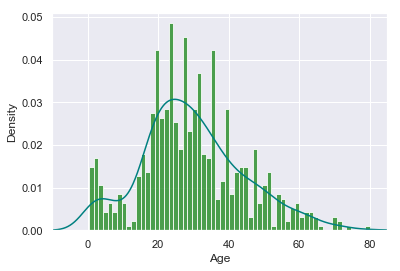

Stacked counts of rectified ages with density plot line


In [40]:
# Barchart Class occurences 
fig, ax = plt.subplots()
ax = TRAIN["Age"].hist(bins=60, density=True,
                       stacked=True,
                       color='forestgreen', 
                       alpha=0.8)
TRAIN["Age"].plot(kind='density', 
                  color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

print ('Stacked counts of rectified ages with density plot line')

Our distribution is still skewed to the right (higher occurence of survival for 20-30 age range). Let's see if class has any influence on this distribution. Let's create a boxplot for every class and see if for every type of class the variances of occurences of survival on age. We also still see a distribution below ages < 18. Let's see if we can use our variable AgeFilter that we created and appended to our Dataframe, to how that affects survival rates.

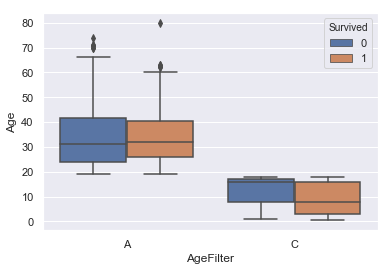

In [41]:
sns.boxplot(x="AgeFilter", y="Age",
                hue="Survived",
                data=TRAIN)


On face value being a child does significantly reduces nor increases your survival rate, compared to being an adult. We can infer that just like we did before, from the whiskers. Let's see how class sets differences in survival rate for all ages, and than see how all these variables relate to each other.

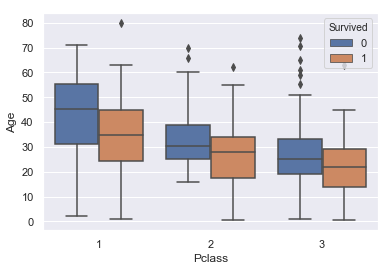

In [42]:
sns.boxplot(x="Pclass", y="Age",
                hue="Survived",
                data=TRAIN)


Occurences of survivors for class one on face value are evenly distributed, just as all the other classes. We can judge that by comparing survival occurences within each class. We can see that the whiskers are within each ranges. So, not deterministic difference However, interestingly we see many outliers in our imputed dataset for class 2 and 3. 

In class 3 a higher occurence of non-surival for ages > 55 seems to occur more often than in class 2 and 1. Let's see how survival rates are for males and females for different classes.

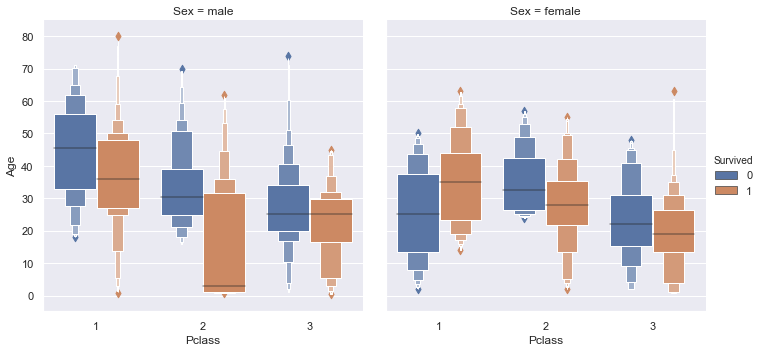

In [43]:
f = sns.catplot(x="Pclass", y="Age",
                hue="Survived",
                col="Sex",
                data=TRAIN,
                kind="boxen");


This effect seems to be mediated by being a male or female. Over all the age averages of males dying is greater in 1st class and 2nd class, indicating older males died more than younger females in the of the same class. Furthermore, being female in the 3rd class lowers the average chance of surviving than being a male in the 3rd class. You can see that more males with age > 50 died in the 3rd class than females in the same class.



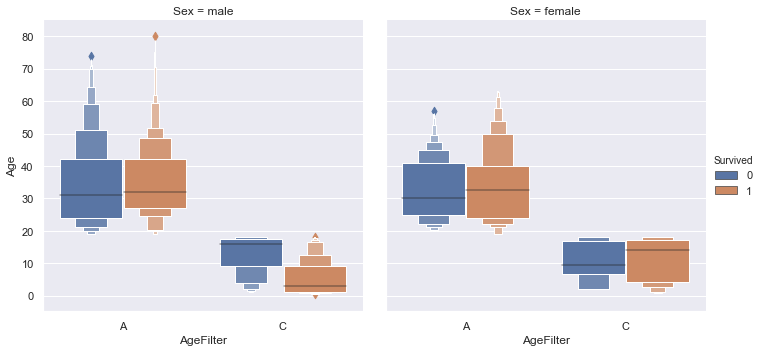

In [44]:
f = sns.catplot(x="AgeFilter", y="Age",
                hue="Survived",
                col="Sex",
                data=TRAIN,
                kind="boxen");

As we might expect, the whiskers of our boxplots do no lie in each others range, except in the same category. Indicating different age groups, but no big differences between males and females on surviving when controlling for the AgeFilter. 

Let's check our survival rates for varying ages of survivors and non-survivors at different embarkations for males, and females.

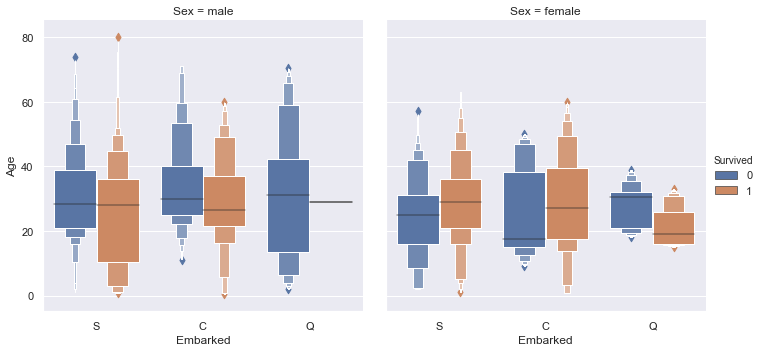

In [45]:
z = sns.catplot(x="Embarked", y="Age",
                hue="Survived",
                col="Sex",
                data=TRAIN,
                kind="boxen");

#ax = sns.stripplot(x="Embarked", y="Age", hue='Survived', data=TRAIN,
##                    size=2, jitter=True, dodge=True, color="grey")


We can clearly see a difference between the survival rate of males and females embarking the Titanic ship from Queenstown and those embarking from Southend and C. It looks like more men died that embarked the ship from Queenstown. Let's find our hidden variable! First, let's look at the distribution of survival rates between males and females.

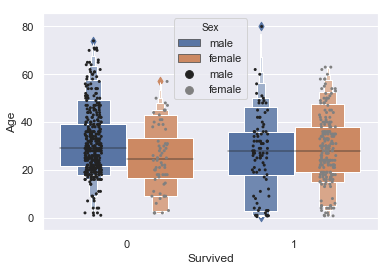

In [46]:
ax = sns.boxenplot(x="Survived", y="Age", hue='Sex', data=TRAIN)
ax = sns.stripplot(x="Survived", y="Age", hue='Sex', data=TRAIN,
                    size=3, jitter=True, dodge=True, color="grey")

The above figure represents the offset of males versus females on survival rates. We don't see big differences, but we know almost no females died embarking in Queenstown as compared to males embarking in the same town. Let's create a catplot of 3 box plots determining the survival rate of person's within classes departing from 3 embarkations. 

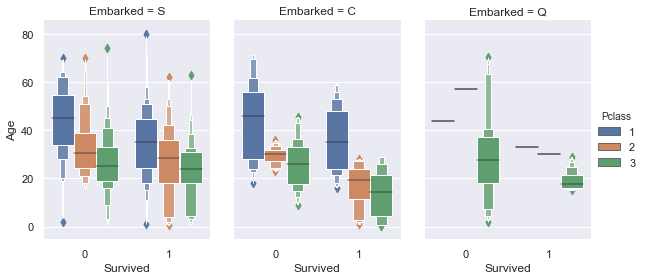

In [47]:
o = sns.catplot(x="Survived", y="Age",
                hue='Pclass', col= 'Embarked',
                data=TRAIN,
                 kind="boxen",
                height=4, aspect=.7);



We can see that the greatest age variance in the survival rate of classes embarking from different towns is highest in embarkation from Southend. This means that class S probably isn't significantly explaining variance in survival rates between classes. This can be explained by that all ages for persons in S are not different on class for survival rate. 

Survival rates for persons departing from C seem substantially different between classes. For instance, no persons embarking at C with age > 30 in class 2 and class 3 survived. However, maybe this effect is also mediated through our age filter. Let's add a grid with plots with rows sex, and columns embarkation. For every row,index plot boxplots for age variances on survival rates of males and females embarking from S,C or Q are shown, and index the boxplots on class. 

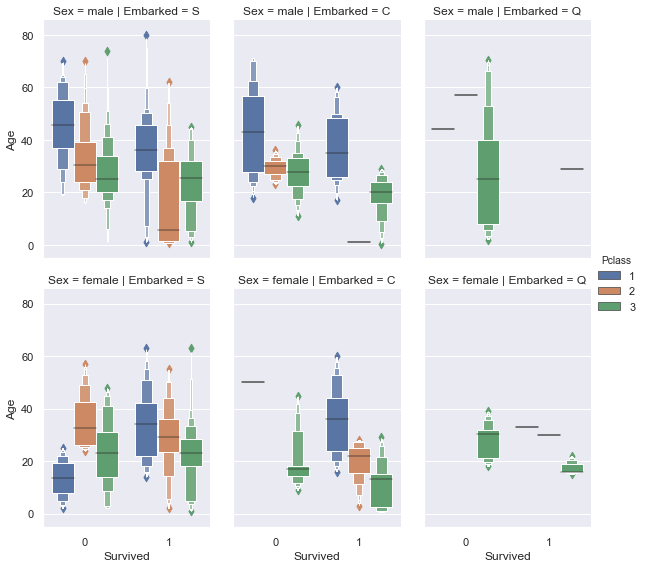

In [48]:
w = sns.catplot(x="Survived", y="Age",
                hue='Pclass', col= 'Embarked',
                row='Sex',
                data=TRAIN,
                 kind="boxen", 
                height=4, aspect=.7);

In summation:

First of all, I haven't listed everything. We can however sum our observations up and then, try to predict with our TEST data if a person with set weights would survive.

General:
1. Persons age variances on survival departing from S where highest.

Class:
1. No males age > 3 from class 2 survived embarking from C.
2. No males died in class 1 embarking from C age < 20. 
3. Survival occurences for class 1 females age < 20 were lower than for males age < 20 embarking from S. (No heroes in class 1)

Sex:

1. Males have lower occurences of surviving than females when embarking from C and S.
2. Males have highest occurences of surviving when embarking from Q.
3. No 1st and 2nd class females died embarking from Q.
4. All 1st and 2nd class males died embarking from Q. (Is this where our heroes are?) 
5. But only a handfull of class 1 and class 2 females embarking from Q survived. 

There are numerous ways of interpreting the data, more than I was willing to write here without diverting too much. But, what if we want to predict survival rate by those same factors? To do that we have to create a simple neural net that learns from our dataset to predict survival rate. Let's also apply an association rule to predict, and compare the neural net with our association rule algorithm.


In [49]:
TRAIN.head()

,AgeFilter,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,A,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,A,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,A,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,A,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,A,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [50]:
TRAIN.isnull().sum()

AgeFilter        0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

As you can see Age has no missing values. Embarked has two, and thus must we replace it by any embarkation number.
Let's quickly check our distribution. We will impute the two embarkations with highest occurences of persons. 

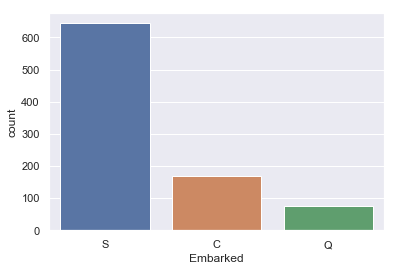

In [51]:
sns.countplot(TRAIN['Embarked'])

Let's put an S and C in the two missing values. 

In [52]:
#Create list of Embarkation values
embark_ = list(TRAIN['Embarked'])

#Impute function to rectify embarkation values according to the countplot
def embark_rect(klist):
    #Create empty list and set count to 0
    dlist = []
    count = 0
    #Iterate over the list
    for i in klist:
        #Filter i on 'nan', count < 1
        if i == 'nan' and count <1: 
            #Append embarkation of C category children
            dlist.append('C')
            #Increment count 
            count += 1
        #Filter if count => 1
        elif i == 'nan' and count >= 1:
                dlist.append('S')
                count += 1
        else:
            #Append i if i is an age value
            dlist.append(str(i))
            
        
    #Returns list of values
    print (dlist[:6])
    print (type(dlist[6]))
    
    return dlist

#Change nan-values to S and N and set as new list
new_embark_list = embark_rect(embark_)
new_embark_list[:10]

['S', 'C', 'S', 'S', 'S', 'Q']
<class 'str'>


['S', 'C', 'S', 'S', 'S', 'Q', 'S', 'S', 'S', 'C']

In [53]:
#Impute our new_age_list variable from imputation on a re-shuffled index for bias reduction as a age column
TRAIN['Age'] = new_age_list #Median Imputed
TRAIN['Embarked'] = new_embark_list #S and C imputed


In [54]:
#Independent Variables
c_class_ = TRAIN.iloc[:,3:4].values #Class
c_class_ = [float(i) for i in c_class_]            
c_age_ = TRAIN.iloc[:, 6:7].values #Sex
c_age_ = [float(i) for i in c_age_]
c_sex_ = TRAIN.iloc[:,5:6]
c_embarkation = TRAIN.iloc[:,12:13].values #Embarkation
c_agefilter = TRAIN.iloc[:,0:1].values #Age filter: c or a

In [55]:
#Encoding the categorical variables
from sklearn.preprocessing import LabelEncoder
#Initialise encoders
ohe_sex = LabelEncoder()
ohe_af = LabelEncoder()
ohe_em = LabelEncoder()

#Standardise age values

In [56]:
#Fit and transform the categorical values with the OneHotEncoder
c_sex_ = ohe_sex.fit_transform(c_sex_)
c_agefilter = ohe_af.fit_transform(c_agefilter)
c_embarkation = ohe_em.fit_transform(c_embarkation)


/anaconda3/envs/CodexA/lib/python3.6/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/envs/CodexA/lib/python3.6/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/envs/CodexA/lib/python3.6/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [57]:
#Reshape data for readability by the forward Neural Net
c_agefilter = np.reshape(c_agefilter, (-1,1))
c_embarkation = np.reshape(c_embarkation, (-1,1))
#c_sex_ = np.reshape(c_sex_, (-1,1))
#c_class_ = np.reshape(c_sex_, (-1,1))
c_embarkation = np.reshape(c_sex_, (-1,1))
#c_age_ = np.reshape(c_age_,(-1,1))

In [58]:
print (c_class_[:10])
print (c_age_[:10])
print (c_sex_[:10])
print (c_embarkation[:5])
print (c_agefilter[:10])


[3.0, 1.0, 3.0, 1.0, 3.0, 3.0, 1.0, 3.0, 3.0, 2.0]
[22.0, 38.0, 26.0, 35.0, 35.0, 9.04, 54.0, 2.0, 27.0, 14.0]
[1 0 0 0 1 1 1 1 0 0]
[[1]
 [0]
 [0]
 [0]
 [1]]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]]


In [65]:
#New dataframe with variables for the neural net
nn_df = pd.DataFrame()
nn_df['Class'] = c_class_
nn_df['Age'] = c_age_
nn_df['Sex'] = c_sex_
nn_df['Embarkation'] = c_embarkation
nn_df['Agefilter'] = c_agefilter
#nn_df['Survived'] = TRAIN['Survived']

nn_df.head()
#X = np.concatenate((c_class_, c_age_,  c_sex_, c_embarkation, c_agefilter))
y = TRAIN.iloc[:,2:3].values #Survival yes/no
#print (X[:10])
#print (y[:10])



In [66]:
#Create numpy array for to set as X feature for prediction
X = nn_df.iloc[:,:]
X.head()

,Class,Age,Sex,Embarkation,Agefilter
0,3.0,22.0,1,1,0
1,1.0,38.0,0,0,0
2,3.0,26.0,0,0,0
3,1.0,35.0,0,0,0
4,3.0,35.0,1,1,0


In [67]:
#Standardise all values
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

/anaconda3/envs/CodexA/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/envs/CodexA/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[ 0.82737724, -0.54745109,  0.73769513,  0.73769513, -0.42993072],
       [-1.56610693,  0.61949634, -1.35557354, -1.35557354, -0.42993072],
       [ 0.82737724, -0.25571423, -1.35557354, -1.35557354, -0.42993072],
       ...,
       [ 0.82737724,  0.29712711, -1.35557354, -1.35557354, -0.42993072],
       [-1.56610693, -0.25571423,  0.73769513,  0.73769513, -0.42993072],
       [ 0.82737724,  0.18189105,  0.73769513,  0.73769513, -0.42993072]])

In [68]:
#Create test/train set from data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state= 0)

#Feature Scaling x_train and x_test (Z-scores) 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [69]:
X_train

array([[ 0.83012938, -0.11983869,  0.72705166,  0.72705166, -0.42696708],
       [ 0.83012938, -0.92323881, -1.37541808, -1.37541808,  2.34210096],
       [ 0.83012938,  0.02623405,  0.72705166,  0.72705166, -0.42696708],
       ...,
       [ 0.83012938,  0.28770427,  0.72705166,  0.72705166, -0.42696708],
       [ 0.83012938,  0.4644523 , -1.37541808, -1.37541808, -0.42696708],
       [-0.36497068,  2.21732527,  0.72705166,  0.72705166, -0.42696708]])

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1c317240>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1c317b70>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1c3170b8>,
 'medians': [<matplotlib.lines.Line2D at 0x1a1c31f470>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a1c31f8d0>,
 'means': []}

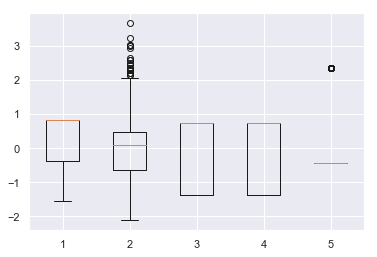

In [70]:
plt.boxplot(X_train)

In [71]:
X_test

array([[ 0.83012938,  0.28770427,  0.72705166,  0.72705166, -0.42696708],
       [ 0.83012938,  0.28770427,  0.72705166,  0.72705166, -0.42696708],
       [ 0.83012938, -1.65360255,  0.72705166,  0.72705166,  2.34210096],
       ...,
       [ 0.83012938, -0.77716606,  0.72705166,  0.72705166, -0.42696708],
       [-1.56007074, -0.63109331, -1.37541808, -1.37541808, -0.42696708],
       [ 0.83012938, -1.87271167, -1.37541808, -1.37541808,  2.34210096]])

In [72]:
#Create the classifier
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train) 

/anaconda3/envs/CodexA/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/CodexA/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [73]:
#Predict y based on x_test
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1])

In [74]:
y_pred = np.reshape(y_pred,(-1, 1))

In [75]:
y_pred[:5]

array([[0],
       [0],
       [0],
       [1],
       [1]])

In [76]:
#Making the Confusion Matrix to evaluate the model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print (cm)
print ('116+61/116+23+23+61 = 83% Sensitivity/Accuracy')
print ('116/116+23 = 83% Positive Predictive Value') #The bigger the N the bigger the prevalence, the higher the chance to find data against the H0
print ('61/61+23 = 61% Specificity') 

[[116  23]
 [ 23  61]]
116+61/116+23+23+61 = 83% Sensitivity/Accuracy
116/116+23 = 83% Positive Predictive Value
61/61+23 = 61% Specificity


In [77]:
#Let's print the classification report anyway
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

print ('The accuracy we calculated is the same.')

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       139
           1       0.73      0.73      0.73        84

   micro avg       0.79      0.79      0.79       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223

The accuracy we calculated is the same.


Lastly, let's plot a Receiver Operating Characteristic that displays the false positive rate against the true positive rate. A false positive observation means that the number of times the neural net classifies something as 'true', but falsely does so a number of times, is compared to the number of times it classifies something true which is true. On the X-axis the FP or False Positives, and on the y-axis the TP or True positives. You want the curve to bulge out to the left top corner so that, the area under the curve becomes larger, which translates to a better test accuracy. If you take the slope of tangent line at a given cutpoint on the line, you get the likelihood ratio(LR) for that value. Multiplying all those values gives you a tiny value, for which you can use the log-function in base 10. With the log-likelihood are able to built classification models (AIC) with n parameters in which you maximise regression power and minimise n. 

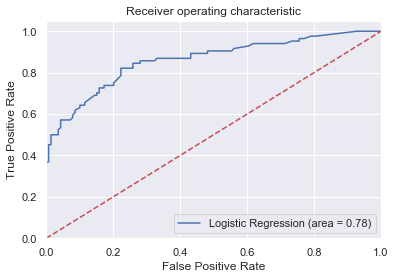

In [78]:
#Create ROC Curve
#Import libraries
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#Plot X_test vs y_test
logistic_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
#Get false positive rate, true positive rate and tresholds
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
#Plot the figure
plt.figure()
#Plot the curve
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logistic_roc_auc)

#Set axis
#Plot line
plt.plot([0, 1], [0, 1],'r--')
#Set axis limits
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
#Set x,y labels, title and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

This notebook was intended to operate on different skillset in handling data. We showed that children were saved, men and women died coming from lower classes and embarking from Queenstown. To do this we had to create some functions to re-shuffle our indexed data and impute it with variables following a biniomial distribution. Then we created a neural net to train our classifier on. Logistic regression was used to predict chances of survival given class, age, an agefilter, sex and embarkation. Our instrument was 83% accurate on the training data. Let's predict on the TEST data , show the ROC curve and call it a day.

In [85]:
TEST = pd.read_csv('test.csv')
TEST.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [86]:
TEST = TEST.drop(TEST.columns[[0, 2,5,8,9]], axis=1)
TEST.head()

,Pclass,Sex,Age,Parch,Ticket,Embarked
0,3,male,34.5,0,330911,Q
1,3,female,47.0,0,363272,S
2,2,male,62.0,0,240276,Q
3,3,male,27.0,0,315154,S
4,3,female,22.0,1,3101298,S


In [87]:
TEST.isnull().sum()

Pclass       0
Sex          0
Age         86
Parch        0
Ticket       0
Embarked     0
dtype: int64

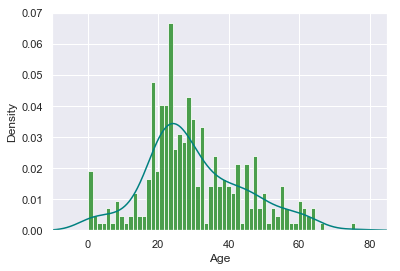

Stacked counts of ages with density plot line


In [88]:
# Barchart Class occurences 
fig, ax = plt.subplots()
ax = TEST["Age"].hist(bins=60, density=True,
                       stacked=True,
                       color='forestgreen', 
                       alpha=0.8)
TEST["Age"].plot(kind='density', 
                  color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

print ('Stacked counts of ages with density plot line')

This test set is slightly skewed to the right, but it does look to a binomial distribution as in our train set. We need to set our columns of features to the same order numpy array for logistic classification. Because of the skewness we will impute the median value for the missing values.

In [89]:
#Set to numpy array
test_age_list = []
for i in TEST['Age']:
    if i > 1.0:
        test_age_list.append(i)

#Calculate median
test_med_age = statistics.median(test_age_list)

print ('Median of age category TEST set: ', test_med_age)

Median of age category TEST set:  28.0


In [90]:
#Convert all age items to strings
new_test_age = []
for i in TEST['Age']:
    new_test_age.append(str(i))

In [103]:
#Impute function to rectify age values according to the binomial distribution
def test_age_rect(klist):
    #Create empty list 
    qlist = []
    #Iterate over the agelist
    for i in klist:
        #Filter i on 'nan'
        if i == 'nan':            
            qlist.append(test_med_age)   
        else:
            #Append i if i is an age value
            qlist.append(i)
            
        
    #Returns list of values
    print (qlist[:6])
    print (type(qlist[6]))
    
    return qlist

In [104]:
#Let's shuffle our deck
test_set_shuffle ,order_test_set = shuffle_forward(new_test_age)

#Print shuffled age list and order
print (test_set_shuffle[:20])
print (order_test_set)

['43.0', '28.0', '49.0', '13.0', '39.0', '32.0', '1.0', '30.0', 'nan', '5.0', '30.0', '27.0', '50.0', '49.0', '32.0', '12.0', 'nan', '41.0', '27.0', '30.0']
[302, 276, 372, 154, 40, 210, 296, 78, 121, 379, 220, 334, 407, 82, 61, 326, 249, 245, 184, 149, 84, 23, 44, 77, 39, 199, 53, 272, 32, 268, 49, 252, 277, 152, 45, 341, 360, 319, 197, 395, 339, 389, 416, 352, 131, 200, 332, 312, 382, 134, 16, 237, 265, 69, 63, 38, 212, 18, 405, 106, 198, 57, 88, 269, 123, 282, 188, 306, 120, 187, 172, 271, 35, 283, 221, 299, 304, 285, 260, 67, 127, 286, 31, 219, 235, 155, 409, 209, 13, 50, 239, 267, 97, 309, 238, 350, 223, 17, 383, 371, 194, 108, 2, 298, 287, 109, 37, 229, 361, 95, 195, 103, 122, 203, 392, 404, 388, 381, 153, 225, 208, 133, 191, 278, 179, 310, 270, 230, 1, 68, 257, 181, 110, 59, 117, 325, 406, 408, 274, 288, 213, 100, 41, 396, 241, 354, 263, 7, 159, 86, 190, 52, 21, 255, 411, 317, 160, 413, 137, 322, 24, 281, 164, 92, 132, 156, 224, 151, 135, 27, 232, 342, 397, 144, 357, 48, 291, 79

In [ ]:
#Change nan values and impute with the median
test_age_rect(test_set_shuffle)
(test_set_shuffle[10])

#Shuffle index backwards 
shuffle_backward(new_test_age, order_test_set)

#Insert Agefilter into dataframe
t_AgeFilter = []
for i in TEST['Age']:
    if i <= 18:
        t_AgeFilter.append('C')
    else:
        t_AgeFilter.append('A')
        
indexx = 0
TEST.insert(loc=indexx, column='AgeFilter', value=t_AgeFilter)
TEST.head()

# To be continued...